<h1 align='center'>Wine dataset from UCI ML Archive</h1>

 These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

The attributes are (dontated by Riccardo Leardi, iclea@anchem.unige.it )

 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

Number of Instances:

    class 1 59
    class 2 71
    class 3 48

Number of Attributes 	

    13

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data_df = pd.read_csv(url, header=None)

In [5]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
cols = """Alcohol
Malic acid
Ash
Alcalinity of ash  
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280_OD315 of diluted wines
Proline""".split('\n')

cols = [c.lower().replace(' ', '_') for c in cols]

In [7]:
data_df.columns = ['target'] + cols

In [8]:
data_df.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash__,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


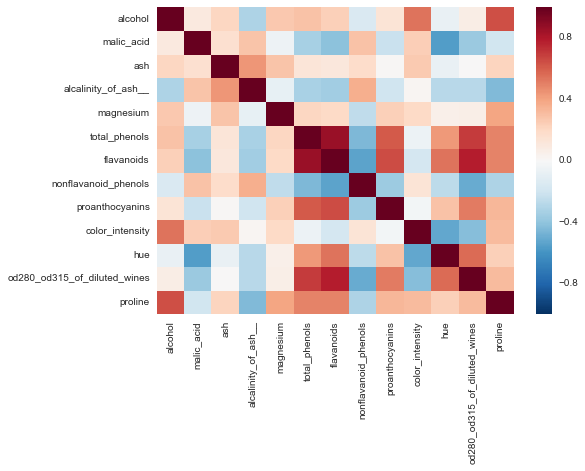

In [9]:
import seaborn as sns
corrs = data_df.drop('target', axis=1).corr()
sns.heatmap(corrs)

In [10]:
features = data_df.drop('target', axis=1)
target = data_df['target']


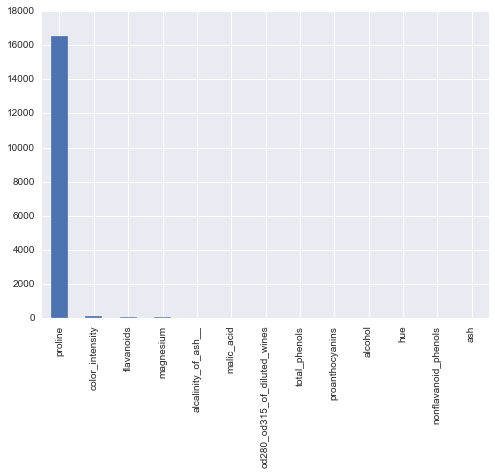

In [16]:
from sklearn.feature_selection import chi2, SelectKBest

s = SelectKBest(chi2, k=5)
s.fit(X=features, y=target)

scores = pd.Series(s.scores_, index=features.columns)
scores.sort_values(ascending=False).plot(kind='bar')

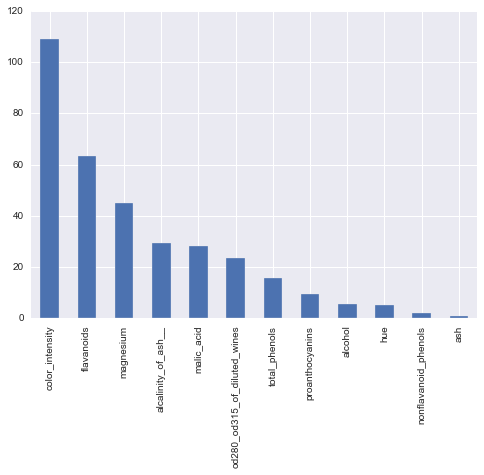

In [18]:
scores.sort_values(ascending=False).iloc[1:].plot(kind='bar')

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

def cross_validate_with_top_n_features(n_features=2, n_folds=5):
    selector = SelectKBest(chi2, k=n_features)
    estimator = GaussianNB()

    pipeline = make_pipeline(selector, estimator)
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    scores = cross_val_score(pipeline, X=features, y=target, cv=cv, scoring='f1_macro')

    score_series = pd.Series(data=scores)
    return score_series
    
cv_results = {'cv_with_%s_features' % k: cross_validate_with_top_n_features(n_features=k) 
              for k in range(2, 10)}

cv_results = pd.concat(cv_results, axis=1)

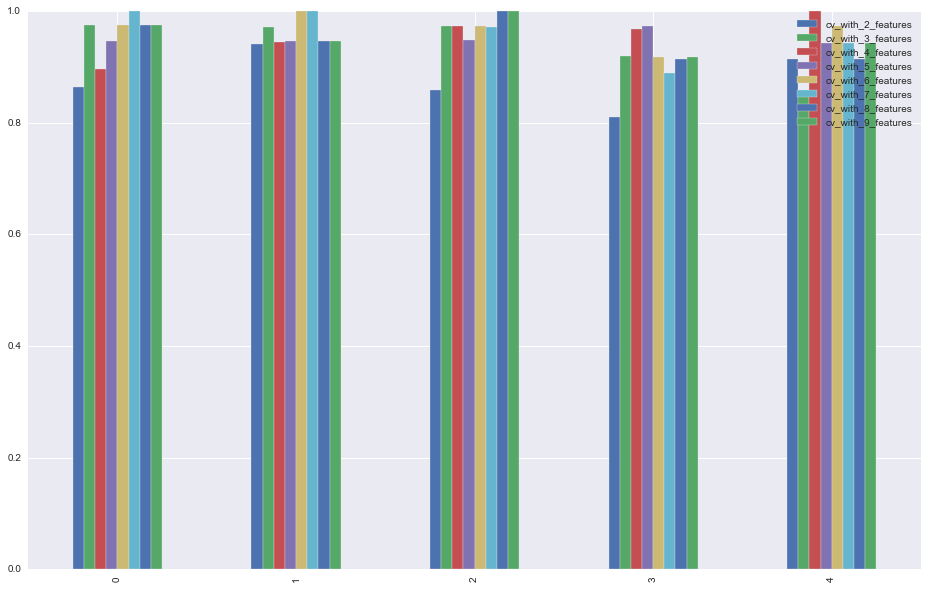

In [47]:
cv_results.plot(kind='bar', figsize=(16, 10))

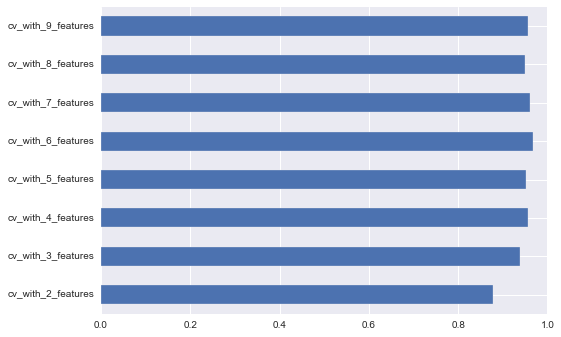

In [46]:
cv_results.mean(axis=0).plot(kind='barh')